In [1]:
# Description: This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM) to predict the closing price of a ticker using the past 60-day stock price

In [2]:
# Import the libraries
import math
from datetime import date,datetime,timedelta
import pandas as pd
import numpy as np
import yfinance as yf

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers

# from keras.models import Sequential
# from keras.layers import Dense, LSTM

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, LSTM

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
tickers_list = ['AAPL']

start_date1 = date.today()-timedelta(days=100)
start_date = start_date1.strftime("%Y-%m-%d")
end_date1 = date.today()-timedelta(days=2000)
end_date = end_date1.strftime("%Y-%m-%d")

# Request data:
data = yf.download(tickers_list , end =  start_date, start = end_date) 

df = pd.DataFrame(data=data).reset_index()

df

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-05,26.437500,26.462500,25.602501,25.677500,23.713696,223164000
1,2016-01-06,25.139999,25.592501,24.967501,25.174999,23.249626,273829600
2,2016-01-07,24.670000,25.032499,24.107500,24.112499,22.268383,324377600
3,2016-01-08,24.637501,24.777500,24.190001,24.240000,22.386133,283192000
4,2016-01-11,24.742500,24.764999,24.334999,24.632500,22.748621,198957600
...,...,...,...,...,...,...,...
1306,2021-03-15,121.410004,124.000000,120.419998,123.989998,123.779747,92403800
1307,2021-03-16,125.699997,127.220001,124.720001,125.570000,125.357071,115227900
1308,2021-03-17,124.050003,125.860001,122.339996,124.760002,124.548447,111932600
1309,2021-03-18,122.879997,123.180000,120.320000,120.529999,120.325615,121229700


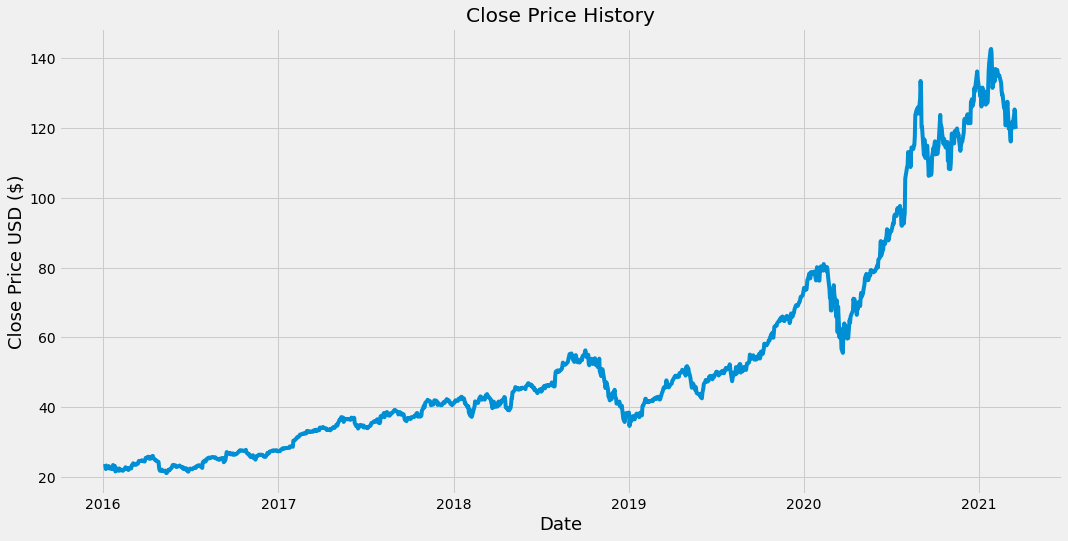

In [4]:
df1 = df.set_index('Date')
# df1.head()
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df1['Adj Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.show()

In [5]:
# Create a new dataframe with only 'Adj Close'
data = df.filter(['Date','Adj Close']).set_index('Date')

# Convert dataframe to numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * 0.8)

training_data_len
# data

1049

In [6]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.02150504],
       [0.01768885],
       [0.00961977],
       ...,
       [0.85070106],
       [0.81597538],
       [0.81154231]])

In [7]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0: training_data_len, :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range (60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.02150504, 0.01768885, 0.00961977, 0.01058807, 0.01356892,
       0.01628389, 0.01140448, 0.01544849, 0.01091085, 0.01001851,
       0.01026531, 0.009335  , 0.01905585, 0.01529661, 0.01634082,
       0.00386701, 0.0051391 , 0.01130952, 0.00958182, 0.00587956,
       0.00942993, 0.01089976, 0.00597478, 0.00786467, 0.00782643,
       0.00645207, 0.00536394, 0.00591754, 0.01097613, 0.01380131,
       0.01025077, 0.00983081, 0.01143425, 0.0072538 , 0.00994534,
       0.0112052 , 0.01149151, 0.01107155, 0.0184018 , 0.01882172,
       0.02025336, 0.02313586, 0.02095973, 0.01935623, 0.01952804,
       0.01962346, 0.0217042 , 0.02220047, 0.02613285, 0.02878619,
       0.0284617 , 0.02869074, 0.0286717 , 0.03021787, 0.02909163,
       0.02821349, 0.02729725, 0.03205041, 0.03563914, 0.03455111])]
[0.036459971979228706]



In [8]:
# Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [9]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(989, 60, 1)

In [10]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [11]:
# Complile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
# Train the model
model.fit(x_train,y_train,batch_size=1, epochs=1)

989/989 [==============================] - 25s 23ms/step - loss: 5.0225e-04


In [13]:
# Create the testing data set
# Create a new array containing scaled values form index 1021 to 1276
test_data = scaled_data[training_data_len - 60:, :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])


In [14]:
# Convert the data to numpy array
x_test = np.array(x_test)

In [15]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [16]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [17]:
# Get the root mean squared error (RMSE)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

5.889569578878224

In [18]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:].reset_index()
valid['Predictions'] = predictions
valid = valid.set_index('Date')
train


,Adj Close
Date,
2016-01-05,23.713696
2016-01-06,23.249626
2016-01-07,22.268383
2016-01-08,22.386133
2016-01-11,22.748621
...,...
2020-02-28,67.699341
2020-03-02,74.002197
2020-03-03,71.651932


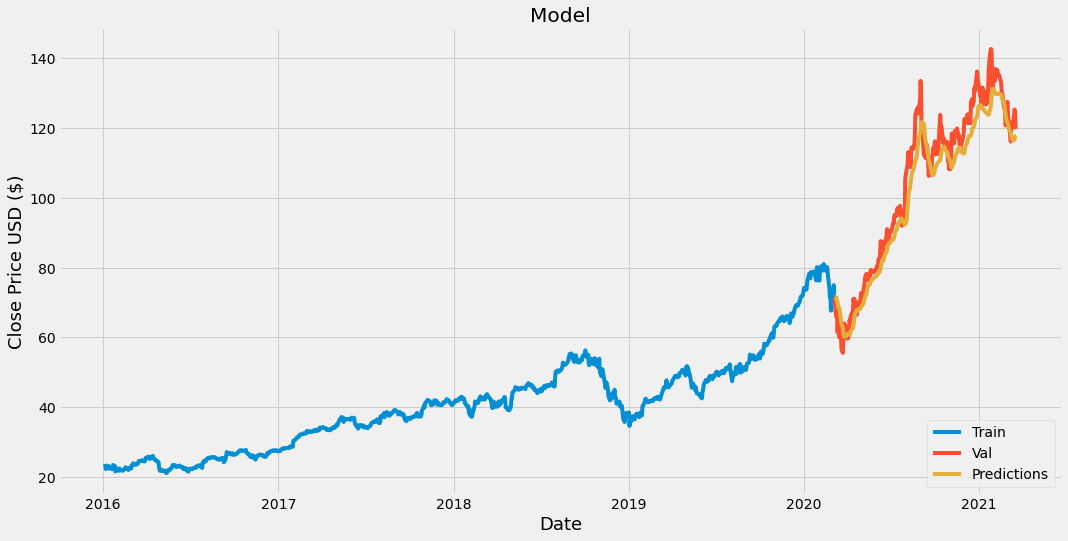

In [19]:
# Visualise the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']])
plt.legend(['Train','Val','Predictions'], loc= 'lower right')

In [20]:
# Show the valid and predicted prices
valid

,Adj Close,Predictions
Date,,
2020-03-06,71.580124,71.625069
2020-03-09,65.918694,71.537254
2020-03-10,70.666267,70.892830
2020-03-11,68.211990,70.470840
2020-03-12,61.475739,69.964821
...,...,...
2021-03-15,123.779747,116.524078
2021-03-16,125.357071,116.767326
2021-03-17,124.548447,117.293350


In [21]:
# Get the quote from 2016-01-04	to 2021-03-18
appl_quote = yf.download(tickers_list , end = '2021-03-18', start = '2016-01-04') 
# Create a new dataframe
new_df = appl_quote.filter(['Date','Adj Close'])
# Get the last 60-day closing price values and convert dataframe to array
last_60_days = new_df[-60:].values
# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
# Create an empty list
X_test = []
# Append the past 60 days
X_test.append(last_60_days_scaled)
# Convert the X_test data set to a numpy array
X_test = np.array(X_test)
# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Get the predicted scaled price
pred_price = model.predict(X_test)
# undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%***********************]  1 of 1 completed
[[117.830505]]


In [22]:
# Get the quote from 2016-01-04	to 2021-03-18
appl_quote2 = yf.download(tickers_list , end = '2021-03-19', start = '2021-03-19') ['Adj Close']
appl_quote2

[*********************100%***********************]  1 of 1 completed


Date
2021-03-18    120.325615
Name: Adj Close, dtype: float64